<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Independent Practice: Grouping Data with `pandas`

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the United States. This lab will give you practice performing `.groupby()` operations to split data along multiple dimensions. You'll also investigate patterns between subsets of the data using basic aggregation.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [35]:
ufo_csv = '../datasets/ufo.csv'

In [36]:
# A:

df = pd.read_csv(ufo_csv)
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [37]:
# A:

df.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

#### 3. Which city has the most observations?

In [38]:
# A:

df.groupby('City').count()[['Time']]\
                  .sort_values(by='Time', ascending=False)\
                  .head(5)

,Time
City,
Seattle,646
New York City,612
Phoenix,533
Las Vegas,442
Portland,438


#### 4. What is the observation count per shape?

In [39]:
# A:

df.groupby('Shape Reported')\
  .count()[['Time']]\
  .sort_values(by='Time', ascending=False)\
  .head(5)

,Time
Shape Reported,
LIGHT,16332
TRIANGLE,7816
CIRCLE,7725
FIREBALL,6249
OTHER,5506


#### 5. Create a subset of the data that contains the top five cities and the top five shapes.

In [40]:
# A:

top_cities = df.groupby('City').count()[['Time']]\
                  .sort_values(by='Time', ascending=False)\
                  .head(5).index.values
top_shapes = df.groupby('Shape Reported')\
              .count()[['Time']]\
              .sort_values(by='Time', ascending=False)\
              .head(5).index.values

In [41]:
top_shapes

array(['LIGHT', 'TRIANGLE', 'CIRCLE', 'FIREBALL', 'OTHER'], dtype=object)

In [42]:
top_cities

array(['Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland'],
      dtype=object)

In [43]:
df_top = df[(df['City'].isin(top_cities)) & (df['Shape Reported'].isin(top_shapes))]

In [44]:
df_top.head()

,City,Colors Reported,Shape Reported,State,Time
96,New York City,NaN,CIRCLE,NY,8/1/1948 2:00
208,New York City,NaN,OTHER,NY,7/15/1952 19:00
313,New York City,NaN,LIGHT,NY,2/15/1955 19:00
367,New York City,NaN,LIGHT,NY,6/15/1956 21:00
568,New York City,NaN,OTHER,NY,10/1/1959 16:00


#### 6. Using this subset, find the percent of each shape seen in each city.

In [45]:
# A:

df_top = df_top[['City','Shape Reported','Time']].groupby(['City','Shape Reported'])\
                                        .size()\
                                        .reset_index()
        
df_top.head()

,City,Shape Reported,0
0,Las Vegas,CIRCLE,42
1,Las Vegas,FIREBALL,22
2,Las Vegas,LIGHT,85
3,Las Vegas,OTHER,36
4,Las Vegas,TRIANGLE,31


In [50]:
df_top.columns = ['City','Shape Reported', 'Count']

In [52]:
df_top['Perc'] = df_top.groupby(['City'])['Count'].apply(lambda x: x/np.sum(x))

In [53]:
df_top

,City,Shape Reported,Count,Perc
0,Las Vegas,CIRCLE,42,0.194444
1,Las Vegas,FIREBALL,22,0.101852
2,Las Vegas,LIGHT,85,0.393519
3,Las Vegas,OTHER,36,0.166667
4,Las Vegas,TRIANGLE,31,0.143519
5,New York City,CIRCLE,56,0.201439
6,New York City,FIREBALL,35,0.125899
7,New York City,LIGHT,105,0.377698
8,New York City,OTHER,42,0.151079
9,New York City,TRIANGLE,40,0.143885


In [54]:
df_top.groupby('City').sum()

,Count,Perc
City,,
Las Vegas,216,1.0
New York City,278,1.0
Phoenix,266,1.0
Portland,231,1.0
Seattle,331,1.0


**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

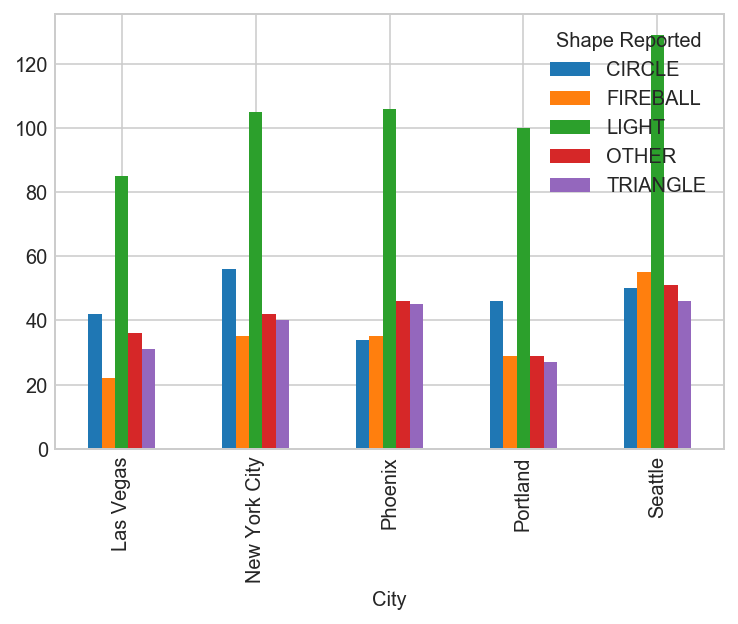

In [68]:
# A:

df_top.groupby(['City', 'Shape Reported'])['Count']\
      .max()\
      .unstack()\
      .plot(kind='bar')\